# Mini In-class project - Fitting Data

## Introduction and setup



Thanks to QuarkNet organization for the basis of this project.

At the Large Hadron Collider at CERN, protons are accelerated to extremly high energies and  collided within massive particle detectors. The particles created in these collisions are measured by experiments such as the Compact Muon Solenoid (CMS) experiment.

<img src="https://github.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/raw/master/Images/cms.jpg">


We will read in real data from the CMS experiment at CERN. This data was recorded using muon particle events. The data containes the measured energy and momentum vector components (px, py, pz) for each muon event.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

The input data is a csv file. We will use np.loadtxt() to read in the file, grab the data, and store it in a numpy array. We need to tell loadtxt that this is a comma seperated data file (delimter=","). We also need to tell loadtxt to skip the first line (skiprows=1) of the data file which contains the column labels "Run", "Event", "E", "px", "py", "pz".

In [ ]:
data = np.loadtxt('https://github.com/QuarkNet-HEP/coding-camp/raw/main/data/muons.csv',float,skiprows=1,delimiter=",")

In [ ]:
data.shape

(475465, 6)

We can see that data is now a 2D numpy array with 6 columns corresponding to the muon "Run", "Event", "E", "px", "py", and "pz", and 475465 rows corresponding to 475465 measured muon events. Here we are lookign at the first 4 events.



In [ ]:
data[0:4,:]

array([[ 1.6561700e+05,  7.4601703e+07,  9.6987300e+00, -9.5104300e+00,
         3.6620500e-01,  1.8632900e+00],
       [ 1.6561700e+05,  7.5100943e+07,  6.2038500e+00, -4.2666100e+00,
         4.5654500e-01, -4.4793000e+00],
       [ 1.6561700e+05,  7.5587682e+07,  1.9289200e+01, -4.2120800e+00,
        -6.5162300e-01,  1.8812100e+01],
       [ 1.6561700e+05,  7.5660978e+07,  7.0426800e+00, -6.3267800e+00,
        -2.6854500e-01,  3.0802500e+00]])

We can create simply 1D numpy arrays of using numpy slicing and indexing:

In [ ]:
Run   = data[:,0]
Event = data[:,1]
E     = data[:,2]
px    = data[:,3]
py    = data[:,4]
pz    = data[:,5]

We can take a look at the Energy array E in a few different ways. The best way to visualize it is with a histogram:

In [ ]:
E

array([ 9.69873,  6.20385, 19.2892 , ..., 18.4607 , 38.867  , 21.7263 ])

In [ ]:
E.shape

(475465,)

Text(0, 0.5, 'Number of Events')

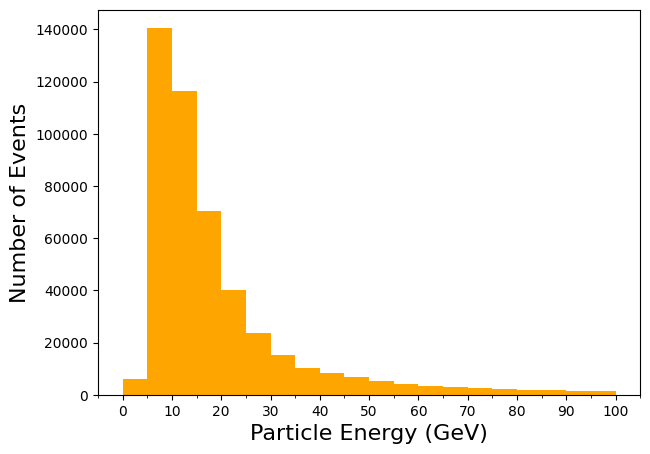

In [ ]:
# Create our figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# Create a histogram
(n,bins,patches) = ax.hist(E, bins=20, range=(0,100), density=False, color = "orange")

# Set the location of the major and minor tick marks on the x-axis
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))

# Label our axes
ax.set_xlabel("Particle Energy (GeV)"      , fontsize=16)
ax.set_ylabel("Number of Events"           , fontsize=16)

We can see that of these thousands of muon events, they most frequently have energy between 5 and 10 GeV.

## Exercise

We currently have energy and momentum information for thousands of muon events recorded by CMS. These are the quantites directly measured by the CMS particle detectors (see https://cms.cern/book/export/html/1618).

### Task 1

Calculate the magnitude of the momentum of each particle and the mass of each particle.

We can calculate the magnitude of the momentum vector using the formula:

$|p| = \sqrt{px^2 + py^2 + pz^2}$

We can caluclate the mass of each particle using the the relativisitic invariant mass formula:

$m = \sqrt{E^2 - p^2}$

Remember we are using numpy, so we can perform these calculations on the entire array (each index of the array corresponds to a different observed muon event).

### Task 2

Plot the particle mass with a histogram. What is the approximate mass of the muon? Note: You will likely have to change the range of the plot to accomodate the low muon mass.

### Task 3

Plot the histogram again but zoomed in very narrowlly on the peak of the plot (hint: use the range functionality of the matplotlib histogram object). I would recommend a range approximately 0.1049 GeV/c^2 to 0.1065 GeV/c^2.

### Task 4

Perform a fit on the histogram from Task 3. Redraw the histogam with the fit.

The functional form expected for a particle decay fit is the relativistic Breit-Wigner distribution(https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution).


Here is an example fit from our fitting notebook (for an exponential).


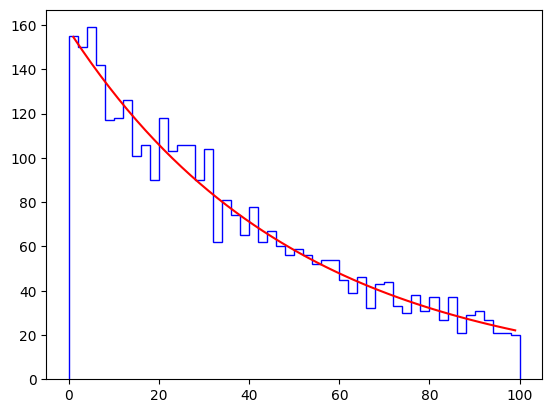

In [ ]:
# Example Fit (EXPONENTIAL)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Create some fake data with np.random.exponential
Npoints = 4000
scale    = 7      # f(x)=(1/scale)e^(-x/scale)
s = 7*np.random.exponential(scale, Npoints) - 1

# Normally we do this to plot:
# plt.hist(s, bins=100, normed=True, histtype='step',color='blue')

# Instead we can do the following such that we access the tuple
#      returned by plt.hist returns a tuple
#      which contains arrays of the information that is being plotted:
#      ( http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist
#    n = array containing the number of entries in each bin )
#    bins = array containing the bin edges (so the length is nbins +1)

(n,bins,patches) = plt.hist(s, bins=50,  range=(0,100), density=False, histtype='step',color='blue')

# to fit we an array of bin centers:
bin_centers = 0.5*(bins[1:] + bins[:-1])

# define the function to fit
def f(t, No, tau_mu, B):
    return No*np.exp(-t/tau_mu) + B

# Guess the parameters of the fit (to give the algorithm a place to start)
guess_No = 1
guess_tau_mu = 1
guess_B = 1

# scipy.optimize.curve_fit
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.curve_fit.html
# curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)[source]¶
# p0 is the initial guess for the function parameters
popt, pcov = curve_fit(f, bin_centers, n, p0 = [guess_No, guess_tau_mu, guess_B])

# curve_fit returns popt which is an array of the fit parameters
fit_result_No     = popt[0]
fit_result_tau_mu = popt[1]
fit_result_B      = popt[2]

# Draw the fit function with parameters returned by the fit
plt.plot(bin_centers, f(bin_centers, fit_result_No, fit_result_tau_mu, fit_result_B  ), 'r')
plt.show()

In our case we will plot the muon mass and with a Breit-Wigner distribution. Here is the functinoal form:

In [ ]:
# define the function used in the fit. In this case we use the relativistic Breit-Wigner function from above
def func_Breit_Wigner(x, particle_mass, width, K):
    return K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2)



Before performing the fit we typically provide the fitting algorithm some ballpark values for the fit parameters. Look at your plot above and determine the approximate mass of the muon and the approximate width of the distribution.



In [ ]:
guess_particle_mass = REPLACE # the x-value of the mass peak
guess_width = REPLACE # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
guess_K = 0.000025  # a constant that affects the height of the curve, you'll need to tinker with this some

Using the histogram fitting example above as a guide, try to fit the muon mass distribution with the Breit Wigner function.

### Task 5

It turns out the lifetime of a particle is related to the width of its mass distribution. Calculate the liftime of the muon.

In [ ]:
hbar = 6.582e-25      # in GeV*s
width = np.fabs(REPLACE WITH THE WIDTH FROM YOUR FIT)/3e8**2
print("mean lifetime = ", np.format_float_scientific(hbar/(2*width),6), " seconds")

Awesome job! By fitting the data you made a measurement of the mass, width, and lifetime of the muon!